In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data=pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Target
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('Target')

X = data.drop(columns=['index','Target'])

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [30]


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

C:\Users\naray\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',keras.metrics.Precision(),keras.metrics.Recall()],
    
)

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - binary_accuracy: 0.8122 - loss: 0.4317 - precision: 0.8474 - recall: 0.8023 - val_binary_accuracy: 0.9056 - val_loss: 0.3412 - val_precision: 0.8672 - val_recall: 0.9805
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - binary_accuracy: 0.9316 - loss: 0.1929 - precision: 0.9383 - recall: 0.9398 - val_binary_accuracy: 0.8846 - val_loss: 0.3495 - val_precision: 0.8326 - val_recall: 0.9922
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - binary_accuracy: 0.9393 - loss: 0.1555 - precision: 0.9387 - recall: 0.9532 - val_binary_accuracy: 0.8694 - val_loss: 0.3575 - val_precision: 0.8110 - val_recall: 0.9981
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - binary_accuracy: 0.9406 - loss: 0.1431 - precision: 0.9451 - recall: 0.9498 - val_binary_accuracy: 0.8940 - val_loss: 0.3163 - val_precision: 0.8412 - val_recall: 0.9981
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - binary_accuracy: 0.9443 - loss: 0.1342 - preci

# Evaluation Metrics

Best Validation Loss: 0.06895659118890762
Best Validation Accuracy: 0.975759744644165
Best Recall: 0.9980506896972656
Best Precision: 0.9776462912559509


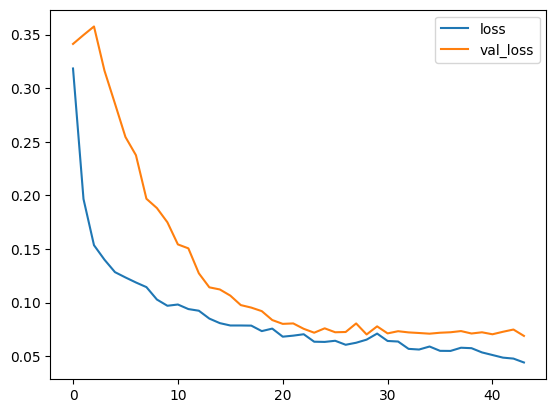

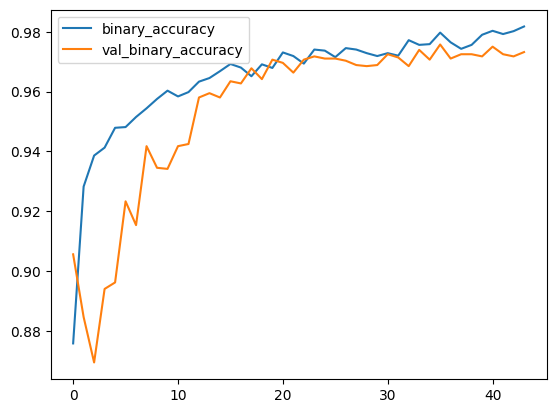

In [7]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
      f"\nBest Validation Accuracy: {history_df['val_binary_accuracy'].max()}"+\
      f"\nBest Recall: {history_df['val_recall'].max()}" +\
      f"\nBest Precision: {history_df['val_precision'].max()}"
)

In [8]:
model.save("model.h5")